## Contents <a id='top'></a>

1. <a href=#intro>Introduction</a>
    1. <a href=#onesample>One Sample $t$-test</a>
    1. <a href=#smoking-mums>Smoking Mums Example</a>
1. <a href=#comp-means>Comparing Means</a>
    1. <a href=#comp-means>Two-Sample $t$-test</a>
    1. <a href=#fev>Forced Expiration Volume Example</a>    
    1. <a href=#dep-samples>Dependent Samples $t$-test</a>
    1. <a href=#more-2>Comparing More Than 2 Groups</a>
    1. <a href=#alt-tests>When Assumptions Fail</a>
1. <a href=#contingency-tables>Contingency Tables</a>
1. <a href=#sim-based>Simulation-Based Inference</a>
    1. <a href=#sim-based>Power Analysis</a>
1. <a href=#ref>References and Links</a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

Quantities you can measure.  
Distribution on a group.  
However, population is ideal, but almost impossible to collect due to the high size and high resources needed for that.  
You can use a sample to represent a population.  
T test, is the sample value correct.  
there's also 2 sample T test, and comparing more than 2 groups.  
All these tests assumes Normal Distribution.  

# Check if the data appears to come from a Normal Distribution!!!!  

## Noromally, you assume a distribution, and check if the data behaviour deviates from that distribution   
None paramatrix procedure: don't assume any distribution ==> can't play game of assuming distribution    

If the sample is collected correctly, then the sample should exhibit the characteristics of the population.  

<a id='intro'></a>
## 1. Introduction
<a href=#top>(back to top)</a>

In statistics, we often wish to make inference about a *population*, using a *sample*. The sample typically has uncertainty associated with it, because the precise values will differ each time we draw a sample from the population.

In other situations, we might want to make comparisons between groups, and to assess if the observed differences between the groups are significant, in light of the uncertainty. This chapter presents some methods of making such assessments.

Here is the typical set-up: Suppose that there is a population, which can be represented by several fixed but unknown parameters. We take a sample of observations in order to estimate the parameters. **Hypothesis tests** allow us to assess the significance of these parameters. The acceptance or rejection of a hypothesis is typically based on the probability of observing a sample at least as extreme as the one that we did observe.

Consider a specific example. Suppose we wish to estimate the **mean** height of all students within NUS. The mean is our parameter of interest. It is typically denoted with a greek letter $\mu$. The population consists of ALL students within NUS. It is not feasible to measure the heights of every single person in the population. So we decide to select 100 students *at random* from the population, and only measure **their** heights. The 100 students form the sample. When we select them, we have to ensure that all students were equally likely to be sampled.

The steps to apply a hypothesis test are:

  1. Make sure you know the assumptions behind the test.
  2. Write down the null and alternative hypotheses. The hypothesis is typically an assertion about the parameter, or the set of parameters of interest.
  3. Compute the test statistic (from the observed data). The test statistic gives an indication of the veracity of the null hypothesis. But it alone is not enough to determine if the null hypothesis is true. We have to consider the distribution of possible test statistic values, to see if what we observed was anomalous, or in accordance with the null hypothesis.
  4. Determine the $p$-value. If a $p$-value is small, then we can either conclude that a rare event has taken place, or that our null hypothesis was not true.
  5. Summarise the conclusion, in the context of the data that you have.
  
*This is the thinking process behind a statistical hypothesis test.*

H0 and H1

Most part will be comparing mean, miu, the actual mean... <>    
The mean characteristics for the population is miu.   

The sample mean is x-bar.   


What are the other charactersitics that need to be tested? variance.... standard deviation...       

We are usually assuming a distribution   

Case in point   
# Please do you EDA   


P -value are describing extremeness   

if p value is very small and close to 0, this means that we don't accept the null hypothesis.   

What does the T tetst do?      
Check how far are the mean of 2 groups of data?   
T-statistics tells you in terms of magnitude, how far is the mean (X-bar) from another group's (population) mean (miu).   
If the p value is small (>0.05), then there are sufficient evidence to reject H0, and we can assume H1 is true.   
A small p value will usually generate a large T-statistics.   
t-statistics is the difference between the 2 means divided by the spread (standard error of the difference)  (standard error = standard dev of sample/ sqrt(n)    

<a id='onesample'></a>
### One-Sample $t$-Test

The one-sample $t$-test is for testing the mean of a population from which we have drawn a random sample. The assumptions are that
  * the observations are independent.
  * the observations are from a Normal distribution with the same mean and variance.

First, let's understand what we mean by a Normal distribution, a mean and a variance using simulation. Probability distributions dictate the frequency with which values occur for values from that distribution. One such probability distribution is the Normal, or Gaussian, distribution. In fact, what we have is a family of distributions, parametrised by a mean and a variance. We can make our computer generate values from Normal distributions:

<a id='onesample'></a>
### One-Sample $t$-Test

The one-sample $t$-test is for testing the mean of a population from which we have drawn a random sample. The assumptions are that
  * the observations are independent.
  * the observations are from a Normal distribution with the same mean and variance.

First, let's understand what we mean by a Normal distribution, a mean and a variance using simulation. Probability distributions dictate the frequency with which values occur for values from that distribution. One such probability distribution is the Normal, or Gaussian, distribution. In fact, what we have is a family of distributions, parametrised by a mean and a variance. We can make our computer generate values from Normal distributions:

Desnity function gives relative probability.   
Std Normal Distribution:  mean 0, std 1   
three sigma rule: 68-95-99.7   
relativie likelihood.   
Continuous value.  
see x1= 0 and x2= -1.2
 y1 approx 0.4, y2 approx 0.2 ==> x1 is twice as likely as x2.   
Find actual probabilty, need to find the area under the curve using integration.   


## Normal distribution    

given by:   



The probability density function of the normal distribution is given by:

\begin{equation}
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}

Where:
\begin{align*}
f(x) & : \text{Probability density function} \\
x & : \text{Random variable} \\
\mu & : \text{Mean of the distribution} \\
\sigma^2 & : \text{Variance of the distribution}
\end{align*}
  


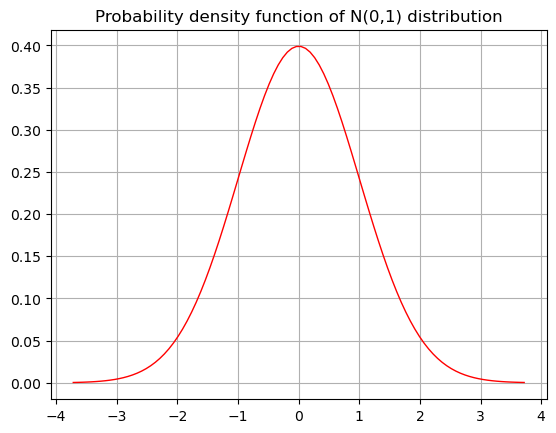

In [3]:
x = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), 100)
plt.plot(x, stats.norm.pdf(x), 'r-', lw = 1); plt.grid()
plt.title("Probability density function of N(0,1) distribution");

In [4]:
np.random.seed(5003)

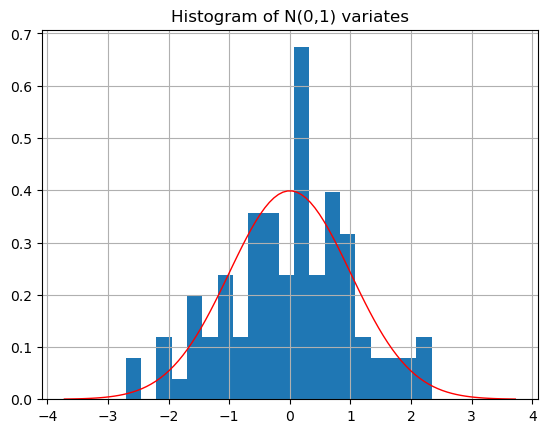

In [5]:
X = np.random.randn(100, )
#plt.hist(X); plt.grid()
plt.hist(X, bins = 20, density = True); plt.grid()
plt.plot(x, stats.norm.pdf(x), 'r-', lw = 1)
plt.title("Histogram of N(0,1) variates");

Observe how the values fill up a bell-shape. Values close to 0 occur more often than values close to 3 or $-$3. This is what we mean by the (empiricaL) distribution of values.

#### Distributional Assumptions

Let's return to our one-sample $t$-test. The null hypothesis states that the data comes from a Normal distribution with a particular mean (centre of the bell shape). We measure the evidence against $H_0$ by assessing how far out in the tails the **observed mean** was, compared to its distribution specified by the null hypothesis.

The null hypothesis is usually denoted by $H_0$ and the alternative by $H_1$. If we represent the unknown mean of the population by $\mu$, then the hypotheses can be stated as:

\begin{align}
H_0 : \mu = \mu_0 \\
H_1 : \mu \neq \mu_0
\end{align}

where $\mu_0$ is a value specified by us before the data collection.

#### Test statistic

The test statistic is the actual number that is used to make the decision in a hypothesis test. It is computed using 

* the measurements in the sample, and 
* parameter values specified in the null hypothesis.

The test statistic for the one sample $t$-test is 

$$
T_1 = \frac{\bar{X} - \mu_0}{s/\sqrt{n}}
$$

where 

* $\mu_0$ comes from the specification of the population mean in the null hypothesis.
* $n$ is the number of observations in the sample.
* $s$ is the standard deviation of the sample.
* $\bar{X}$ is the mean and $s$ is the standard deviation of the values **in the sample,** computed from
$$
\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i \qquad \text{and} \qquad s = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2 }
$$

Large positive or negative values of $T_1$ indicate evidence against the null hypothesis, because this means that $\bar{X}$ is very far-removed from $\mu_0$, which we believed to be true.

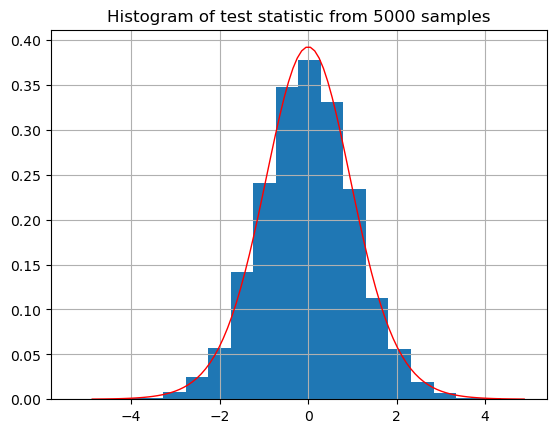

In [6]:
ts0 = [stats.ttest_1samp(np.random.randn(16, ), 0)[0] for x in range(5000)]
plt.hist(ts0, bins = 20, density = True); plt.grid()
t = np.linspace(stats.t.ppf(0.0001, df = 15), stats.t.ppf(0.9999, df = 15), 100)
plt.plot(t, stats.t.pdf(t, df = 15), 'r-', lw = 1) # Density for T stats with 15 degrees of freedom.   
# Why 15 deggrees of freedom. I know need to minus off 1 becasue sample size is 15.   
# The question should be WHY standard Deviation need to minus 1????? (If finding sample standard?)
plt.title("Histogram of test statistic from 5000 samples");

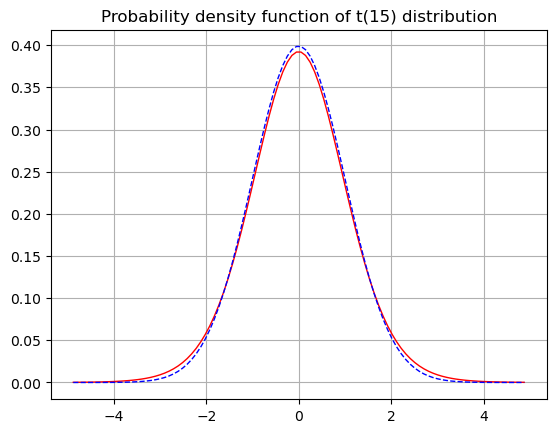

In [7]:
t = np.linspace(stats.t.ppf(0.0001, df = 15), stats.t.ppf(0.9999, df = 15), 100)
plt.plot(t, stats.t.pdf(t, df = 15), 'r-', lw = 1); plt.grid()
plt.plot(t, stats.norm.pdf(t), 'b', lw = 1, linestyle = 'dashed');  # N(0,1) pdf for comparison
plt.title("Probability density function of t(15) distribution");

#### $p$-Value

The $p$-value is the probability of obtaining the observed test statistic or a more extreme value, when $H_0$ is true. 
If this probability or $p$-value is very small, then we can conclude that:

> Either an exceptionally rare (chance) event has occurred or the theory is not true.

A typical value that it is compared to is 0.05 but remember that this is arbitrary in some sense.

<a id='smoking-mums'></a>
### Smoking Mums Example

The file `smoking_mum_baby_wt.csv` contains the weights of 47 babies born to mothers who smoked. In this section, we shall test whether the mean weight of those babies was significantly different from 3.50 kilograms.

In [8]:
baby_wts = pd.read_csv('../data/smoking_mum_baby_wt.csv', header = 0)

#### Step 1: Check Assumptions

From the boxplot, it does seem as the though the median weight of babies is less than 3.5 kg. The histogram does not indicate strong skewness in the distribution.

We can't check for consistency, we check for inconsistency.  

In [9]:
baby_wts.head()

,id,x
0,1,3.120713
1,2,3.742134
2,3,2.494756
3,4,3.801101
4,5,3.542554


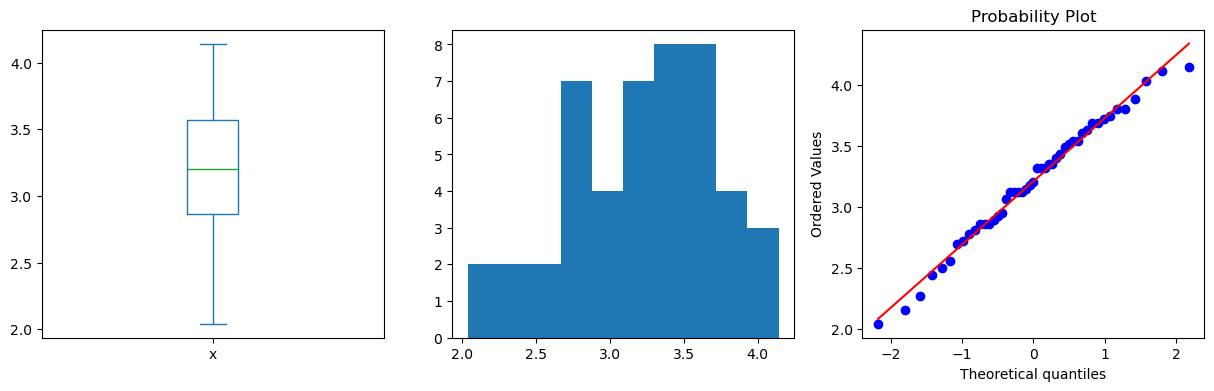

In [10]:
from myscripts import inference

inference.check_normality(baby_wts.x)

# The last plot is the QQ plot, the quantile quantile plot.  

Another method to check Normality is to make a quantile-quantile plot.

The quantile-quantile plot above is a visual comparison between a dataset and 
a theoretical Normal distribution. If most of the points are close to the line, we would conclude that the data is from a Normal distribution. From the plots above, we would conclude that it is reasonable to assume that the data is from a Normal distribution. The assumption holds; we can proceed to the next step of the test.

#### Step 2: Null and Alternative Hypotheses

The statement of the hypotheses in this case would be 

\begin{eqnarray}
H_0 &:& \mu = 3.50 \\
H_1 &:& \mu \ne 3.50 
\end{eqnarray}

Remember that null and alternative hypotheses cannot have any overlap in the regions that they specify.

#### Steps 3 & 4: Compute test statistic and $p$-value

In [11]:
ts = stats.ttest_1samp(baby_wts.x, 3.5)
print(f'The test statistic value is {ts[0]:.3f}.')
print(f'The corresponding p-value is {ts[1]:.3f}.')

The test statistic value is -3.957.
The corresponding p-value is 0.000.


In [12]:
ts

TtestResult(statistic=-3.9565927867709956, pvalue=0.0002609655465493679, df=46)

#### Step 5: Conclusion from $p$-Value

We would conclude that we have strong evidence against the null hypothesis and that the mean weight of babies born to smoking mothers is significantly different from 3.50 kg.

<a id='comp-means'></a>
## 2. Comparing Means
<a href=#top>(back to top)</a>

### Two-Sample $t$-Test

This test is used to assess if two groups of observations come from populations with the same mean. The assumptions for this test are that 
  * The data are independent (within each group and between the groups).
  * *The two populations have the same variance.*
  * The data are Normally distributed.
  * $s_p$ is the pooled standard deviation.
  
If the two groups have different variances, we have to apply the test for unequal variances. To check if the variances are equal, we can apply a heuristic rule: if the larger (sample) standard deviation is more than twice the smaller one, then use the test for unequal variances.

The null and alternative hypotheses are typically stated as 

\begin{align}
H_0 : \mu_1 = \mu_2 \\
H_1 : \mu_1 \neq \mu_2
\end{align}

If we denote the observations from group 1 as $X_1, X_2, \ldots, X_{n_1}$ and the observations from group 2 as $Y_1, Y_2, \ldots, Y_{n_2}$, then the formula for the test statistic is 

$$
T_2 = \frac{(\bar{X} - \bar{Y}) - (\mu_1 - \mu_2)}{s_p/\sqrt{n_1 + n_2 -2}}
$$

<a id='fev'></a>
### Forced Expiration Volume Example

Forced Expiration Volume (FEV) is an index of pulmonary function, that measures the volume of air expelled after 1 second of constant effort. The dataset `fev.csv` contains measurements on 654 children in 1980. 

In the dataset, 0 represents a female and 1 represents a male. Similarly, in the smoking column, 0 represents a non-smoker and 1 represents a smoker.

Let us perform a two-sample $t$-test to assess if the mean FEV for males is different from mean FEV for females.

In [13]:
fev = pd.read_csv('../data/fev.csv', header = 0)

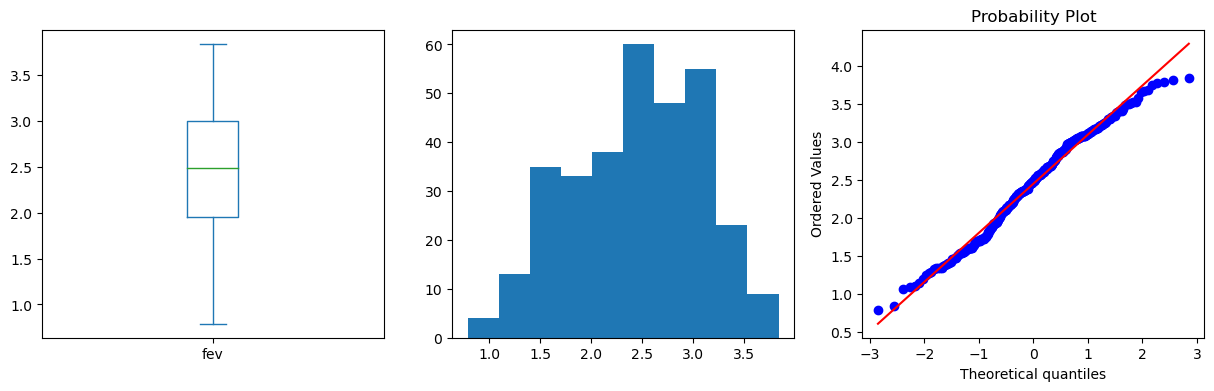

In [14]:
inference.check_normality(fev.fev[fev.Sex == 0])

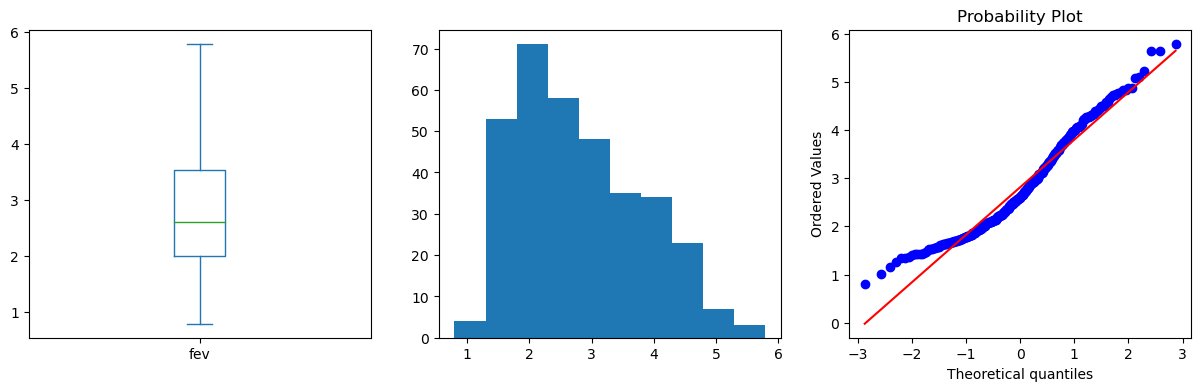

In [15]:
inference.check_normality(fev.fev[fev.Sex == 1]) # If too light on the left, the dots shows up abv the 45 degrees line  

In [16]:
fev.groupby('Sex').fev.describe().round(3) # If ratio is less than 2 for std dev, we will assume equal variance.  

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
0,318.0,2.451,0.646,0.791,1.949,2.486,2.992,3.835
1,336.0,2.812,1.004,0.796,2.008,2.606,3.535,5.793


While it is reasonable to assume equal variance between the two populations, the assumption of Normality for the second group is suspect. Specifically, we can see that the sample distribution is quite right-skewed. 

Still, we can proceed with the two-sample $t$-test with equal variances; $t$-tests are generally robust to mild violations of their assumptions.

In [17]:
ts2 = stats.ttest_ind(fev.fev[fev.Sex == 0], fev.fev[fev.Sex == 1]) # Assumes equal var, if not use equal_var = Flase arguments
# print(f'The test statistic value is {ts2[0]:.3f}.')
# print(f'The corresponding p-value is {ts2[1]:.3f}.')
ts2

TtestResult(statistic=-5.441214544130701, pvalue=7.495753953787993e-08, df=652.0)

Where can we use this T test????    
Since we are trying to 

In [18]:
ts2 = stats.ttest_ind(fev.fev[fev.Sex == 0], fev.fev[fev.Sex == 1], equal_var=False) # Assumes equal var, if not use equal_var = Flase arguments
# print(f'The test statistic value is {ts2[0]:.3f}.')
# print(f'The corresponding p-value is {ts2[1]:.3f}.')
ts2

TtestResult(statistic=-5.503733041295312, pvalue=5.6043055785345525e-08, df=575.7531143907639)

<a id='dep-samples'></a>
### Dependent Samples $t$-Test

Sometimes, when we have two "groups", it is possible to match each observation in one group with exactly one observation in the other group. In such cases, the dependent samples $t$-test is appropriate, not the two-sample $t$-test. 

For instance, consider the following studies:
* A group of anorexic girls' weights was measured before and after a treatment for anorexia.
* A group of hypertensive patients' blood pressure was measured before and after a month of treatment by medication.

We let $X_1, X_2, \ldots, X_n$ be the measurements before the therapy (group 1), and let $Y_1, Y_2, \ldots, Y_n$ be the measurements after the therapy (group 2). To analyse dependent data, we construct a new variable 
$$
D_i = X_i - Y_i
$$

If we represent $\mu_D$ as the population mean of the difference in measurements, then testing 
$$
H_0 : \mu_D = 0
$$
is equivalent to testing $H_0 : \mu_1 = \mu_2$.

The rest of the procedure is exactly similar to just the application of the one-sample $t$-test to the dataset of differences.

### Dependent Samples Example

A study was conducted on a sample of 10 patients with kidney disease. After measuring their protein level, they were all treated with a new drug over an 8-week period. The level of protein in their urine was then measured once more.

It is of interest to determine if the amount of protein in the urine has changed significantly, indicating that the drug has an effect. The data is contained in the file `urine.csv`.

In [19]:
renal = pd.read_csv('../data/urine.csv', header = 0)
t3 = stats.ttest_rel(renal.before, renal.after)

print(f'The test statistic value is {t3[0]:.3f}.')
print(f'The corresponding p-value is {t3[1]:.3f}.')

The test statistic value is 3.489.
The corresponding p-value is 0.007.


<a id='more-2'></a>
### Comparing More Than 2 Groups
<a href=#top>(back to top)</a>

When we have more than two groups, we use a generalisation of the two-sample $t$-test. The method is known as ANOVA, which stands for ANalysis Of VAriance. Essentially, we are comparing the variance within groups to the variability between groups. If the latter is large compared to the former, then we have reason to believe that the group means are different. On the other hand, if the variability within the group appears to dominate, then we have too much uncertainty and cannot conclude that the means of the groups are different.

The assumptions of this test are:
  * The observations from each group are from a Normal distribution.
  * The variance within each group is the same.
  * The data are independent (within each group and between the groups).
  
If there are $k$ groups, then the null hypothesis can be stated as
$$
H_0 : \mu_1 = \mu_2 = \cdots = \mu_k
$$

The alternative hypothesis is best stated in words:
$$
H_1 : \text{At least two of group means are different}
$$

The intuitive test statistic is given by the following formula:
$$
\frac{\text{Variability between groups}}{\text{Variability within groups}}
$$

### ANOVA Example

Four different concentrations of fertiliser have been used on a particular plant species. Each concentration is applied to 5 randomly selected plants, and their growth is measured after 2 weeks. In addition, there was a control group, where no fertiliser was used.

In [20]:
growth = pd.read_csv('../data/growth.csv', header = 0)
growth.conc_levels.unique()

array(['control', 'conc1', 'conc2', 'conc3', 'conc4'], dtype=object)

The data consists of 5 readings from five separate groups. The function for the one-way test requires the readings from each group to be in the form of a list, so we use the following list code to split the data apart.

In [29]:
x2

array([[6.8, 7.3, 6.3, 6.9, 7.1],
       [8.2, 8.7, 9.4, 9.2, 8.6],
       [7.7, 8.4, 8.6, 8.1, 8. ],
       [6.9, 5.8, 7.2, 6.8, 7.4],
       [5.9, 6.1, 6.9, 5.7, 6.1]])

In [21]:
# x = [growth.growth[growth.conc_levels == ll] for ll in growth.conc_levels.unique()]
# Easier, since data is ordered:
x2 = growth.growth.to_numpy().reshape(5, 5)

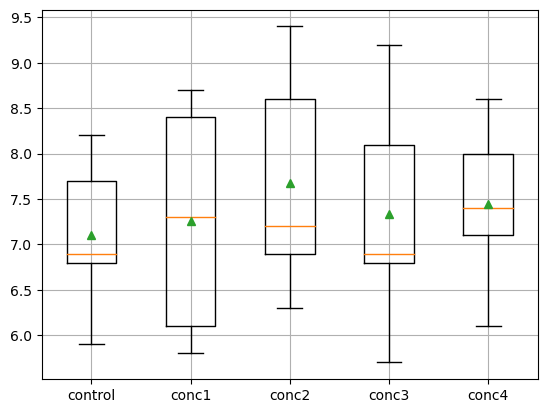

In [22]:
fig, ax = plt.subplots()
ax.boxplot(x2, showmeans = True); ax.grid()
ax.set_xticklabels(growth.conc_levels.unique());

To run the test, we call the following function, which returns a tuple as usual, containing the test-statistic and the $p$-value.

In [23]:
f_obs = stats.f_oneway(*x2)
# Alternative, more explicit code:
# stats.f_oneway(x2[0], x2[1], x2[2], x2[3], x2[4])
print(f'The test statistic value is {f_obs[0]:.3f}.')
print(f'The corresponding p-value is {f_obs[1]:.3f}.')

The test statistic value is 27.495.
The corresponding p-value is 0.000.


The $p$-value is extremely small, but we need to check the assumptions. The key assumption is that the residuals are normally distributed. This function does not return us the residuals, so we compute them ourselves.

In [24]:
growth.head(n = 10)

,growth,conc_levels
0,6.8,control
1,7.3,control
2,6.3,control
3,6.9,control
4,7.1,control
5,8.2,conc1
6,8.7,conc1
7,9.4,conc1
8,9.2,conc1
9,8.6,conc1


In [25]:
growth.groupby('conc_levels')['growth'].mean()

conc_levels
conc1      8.82
conc2      8.16
conc3      6.82
conc4      6.14
control    6.88
Name: growth, dtype: float64

In [26]:
res1 = growth.groupby('conc_levels')['growth'].apply(lambda x: x - np.mean(x))

/tmp/ipykernel_18240/4121088384.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  res1 = growth.groupby('conc_levels')['growth'].apply(lambda x: x - np.mean(x))


In [27]:
res1_index = res1.index.droplevel(0)

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [28]:
res1_values = res1.values

In [ ]:
#growth['res1'] = growth.groupby('conc_levels')['growth'].apply(lambda x: x - np.mean(x))
growth['res1'] = pd.Series(res1.values, res1.index.droplevel(0))

To compare the variances, we use the usual `describe()` function.

In [ ]:
growth.groupby('conc_levels').res1.describe()

In [ ]:
inference.check_normality(growth.res1)

There does seem to be an unusual spike in the central bin of the histogram, but the tails of the distribution seem alright.

More fundamentally, notice what we have done here: we haven't plotted the sample distribution of each concentration level separately to check for normality. Instead, we have plotted the "aggregate" sample distribution, which looks normal enough for us to apply ANOVA. This is a heuristic that is reliable in practice. However, there are other solutions:

<a id='alt-tests'></a>
### When Assumptions Fail
<a href=#top>(back to top)</a>

When one or more of the assumptions fail, we can do one or more of the following:

1. If the residuals appear to be skewed, we can apply a transformation, such as the log or square-root, to make them symmetric.
2. If we do not wish to do that, we may turn to non-parametric versions of these tests. Non-parametric tests such as the Wilcoxon signed-rank test and the Kruskal Wallis test are based on ranks of the observations, not their actual values.

<a id='contingency-tables'></a>
## 3. Contingency Tables (Categorical Variables)
<a href=#top>(back to top)</a>

Suppose that 1,073 patients at NUH were sampled, for a study where the onset of severe chest pain in patients at high risk for cardio-vascular disease (CVD) is recorded for each subject. The 1,073 patients were queried on two aspects:

* Have they experienced the onset of severe chest pain in the preceding 6 months? (yes/no)
* Gender? (male/female)

Here is what the tabulated data look like:

|       | Chest Pain| No Chest Pain| Total|
|:------|----------:|-------------:|-----:|
|Male   |         46|           474|   520|
|Female |         37|           516|   553|
|Total  |         83|           990|  1073|

The two categorical variables are gender and the presence/abscence of chest pain. We can compute conditional proportions (in percentage form) in the table for the preceding example.

|       | Chest Pain| No Chest Pain|
|:------|----------:|-------------:|
|Male   |       8.85|         91.15|
|Female |       6.69|         93.31|

8.85% is a point estimate of $P(\mbox{chest pain} | \mbox{male})$. Similarly, 6.7\% is a point estimate of 
$P(\mbox{chest pain} |\mbox{female})$.

We are interested in knowing if the population quantities are equal. If they are not equal, we say that there is an association between gender and chest pain. If they are equal, we say that there is no association, or that the two variables are independent.

What we are testing in this section is whether or not 
$$
P(\mbox{chest pain} | \mbox{male}) = 
P(\mbox{chest pain} |\mbox{female})
$$

The $\chi^2$-test of independence will have the following hypotheses:
\begin{align}
& H_0 : \text{The two variables are independent} \\
& H_1 : \text{The two variables are dependent}
\end{align}

In order to compute the test statistic, we shall have to compute the expected cell counts, under independence, and compare them to the observed cell counts.

For a particular cell in the table, the *expected cell count* is 
$$
\mbox{Expected cell count} = \frac{\mbox{Row total} \times \mbox{Column
total}}{\mbox{Total sample size}}
$$
It is what we should expect if the categorical variables were independent, but the row and column totals were the same as the observed ones.

The test statistic is (just like in the comparing means case) a scaled version of the "distance" between observed and expected values.

In [ ]:
chest_pain = np.array([[46, 474], [37, 516]])
#chest_pain

In [ ]:
chi2, p, dof, exp = stats.chi2_contingency(chest_pain, correction = True)

The expected cell counts are automatically computed and returned to us. We can inspect them in the following manner. Notice that the expected counts are **not** integers. They are real numbers.

In order to apply this test, we need to have all expected cell counts greater than 5. If this does not hold, we have to turn to Fisher's Exact Test.

In [ ]:
np.round(exp, 2)

For the $p$-value, we find that it is approximately 0.23. This is not extremely small. Hence we say that we do not have strong evidence against the null hypothesis; the two variables are not associated.

To quantify the association, we can describe it in the following ways. 

### Difference in proportion

The difference in proportion could take values between $-$1 and 1. A value close to 0 denotes that the two proportions are similar.

In [ ]:
p_hats = chest_pain[:, 0] / np.sum(chest_pain, axis = 1)
print(f'The difference in proportions is {np.ptp(p_hats):.3f}')

### Risk Ratio

Using the risk ratio is preferrable when the proportions for both groups is close to 0, ot both are close to 1. The risk ratio takes on values between 0 and infinity. A value close to 1 denotes that the proportions are similar to one another.

In [ ]:
print(f'The proportion of CVD for women is {p_hats[1] / p_hats[0]:.2f}',
      'times the proportion of CVD for men.')

### Fisher's Exact Test

If any of the *expected cell counts* are less than 5, we have two options:

1. If both variables aren't binary, i.e. if the contingency table is bigger than 2-by-2, combine cell counts so that the expected values exceed the threshold of 5. (Why do you think we can't combine in the binary case?)
2. Perform Fisher's Exact Test

In the dataset above, the expected cell counts are all above 5, but let us perform the Exact Test and see if there is a great difference in results.

In [ ]:
fish_out = stats.fisher_exact(chest_pain)
print(f'The odds ratio is {fish_out[0]:.3f}, and the p-value is {fish_out[1]:.3f}.')

The $p$-value is very similar: 0.21. In smaller sample sizes, the results may be quite different; in those cases, we should use the Fisher's Test result, as it does not make distributional assumptions on the data.

<a id='sim-based'></a>
## 4. Simulation-Based Inference
<a href=#top>(back to top)</a>
### Power Analysis

Let us revisit the two-sample $t$-test. This was the general form:
\begin{align}
H_0 : \mu_1 = \mu_2 \\
H_1 : \mu_1 \neq \mu_2
\end{align}

Instead of using the $p$-value alone to assess the strength of evidence against the null hypothesis, an alternative method is to specify a **significance level** and then compare the $p$-value to it. If the $p$-value from our data is smaller than the chosen significance level, we reject $H_0$. (*Historically, the values 0.05 and 0.01 have been used, but you should really think about what is relevant for your decision.*)

This returns the four possible outcomes of a test:
  * $H_0$ was true, but we rejected it (*Type I error*).
  * $H_0$ was true, and we did not reject it (*not an error*).
  * $H_0$ was false, and we rejected it (*not an error*).
  * $H_0$ was false, but we did not reject it (*Type II error*).
  
We would like the probabilities of Type I and II errors to be small.

The probability of the Type I error is controlled by the choice of significance level. If we choose the level to be 0.05, it means that the probability of the Type I error is 0.05.

1 minus the probability of the Type II error is known as the **power of a test**.  The probability of the Type II error, and thus the power, depends on the specific alternative hypothesis. In the above case, it depends on the true value of $d = \mu_1 - \mu_2$. 

These ideas can be used to guide us when computing the sample size for a test. Let's think about this for a minute.

Suppose we wish to perform some simple A/B testing: We have two groups, and we wish to be able to detect a significant difference. 

>What sample size should I use?

The question is actually a little more complex than that. Let's think about what we need to consider. The answers to these questions are intuitive, but if you put them in the context of the test statistic for two-sample $t$-tests, you will find they make formal sense too.

$$
T_2 = \frac{(\bar{X} - \bar{Y}) - (\mu_1 - \mu_2)}{s_p/\sqrt{n_1 + n_2 -2}}
$$

  * How does the true difference between the groups affect the sample size that I need?
      * If the true difference is large, I don't need such a large sample from each group.
  * How does the variability within each group affect my sample size?
      * If the variability is small, I don't need a large sample size. Imagine if there was no variability in each group...
  * How does the significance level affect the sample size I need? Recall that the significance level determines my Type I error probability.
      * A smaller significance level means I wish to be more confident of my result - I would need a larger sample size.

Suppose now, that we fix the significance level to be 0.05, with a desired power of at least 0.9 and we are interested in detecting a difference between the means of 1, when the standard deviation of observed values is 1.2. What sample size do I need?

To do this, we are going to simulate running the experiment several times. To be precise:

1. Generate a set of values for each group with some sample size $n$ in each group. The mean for group A could be 0, and the mean for group B 1.0. The standard deviation within each group will be 1.2.
2. Carry out the hypothesis test at significance level 0.05.
3. If we reject, we count it as a correct result.

Repeat steps 1&ndash;3 several times with the same $n$. The proportion 
of times we reject the null hypothesis is an estimate of the power 
of our test. We want this to be at least 0.9.

Now we vary $n$ and repeat the entire procedure. This gives us an estimate of power at various $n$. Then we pick the smallest $n$ that yields a power more than 0.9.

In [ ]:
%time inference.estimate_power(1, 1.2, 40, nsim = 10000)

In [ ]:
n_vals = np.arange(5, 50, step = 4)

power_est = []
for n_ in n_vals:
    power_est.append(inference.estimate_power(1, 1.2, n_))
    print("Done with sample size " + str(n_))

In [ ]:
ax = plt.plot(n_vals, power_est, 'go-')
plt.hlines(0.9, n_vals[0], n_vals[-1], colors = 'b', linestyles = 'dotted')
plt.title('Power Estimates'); plt.grid(axis = 'x'); plt.xlabel('Sample size');

In this case, a sample size of about 32 allows a test of sufficient power.

How would you modify this simulation if you can only have a sample size of 25, say, and you want to find the smallest $d$ that yields a power more than 0.9?

It is also possible to perform **exact** power calculations for the two-sample $t$-test.

In [ ]:
import statsmodels.stats.power as pwr

power_sm = np.array([pwr.tt_ind_solve_power(1/1.2, n_, 0.05) for n_ in np.arange(5, 50)])
plt.plot(np.arange(5, 50), power_sm, 'go-')
plt.hlines(0.9, 5, 49, colors = 'b', linestyles = 'dotted')
plt.title('Exact Power'); plt.grid(axis = 'x'); plt.xlabel('Sample size');

In [ ]:
np.where((power_sm >= 0.9) == True)[0][0] + 5

<a id='ref'></a>
## 5. References and Links
<a href=#top>(back to top)</a>

1. [Python for Data Science (Inferential statistics)](https://www.pythonfordatascience.org/home)
1. [SciPy Statistical Tests](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests)
1. [statsmodels Statistics (`stats`) module](https://www.statsmodels.org/stable/stats.html)